In [2]:
# This script is an example of pre-calibration using a real example of weather-corn yield relationship.
# For simplicity, we use county-wise data in Illinois.
library(binaryLogic)
library(lhs)
frac_between <- function (vect1,vect2,vect3){ #vect2 is lower, vect3 is higher
  totlen<-length(vect1)
  out<-0
  for (i in 1:totlen){
    if ((vect1[i]<vect2[i]) | (vect1[i]>vect3[i])){
      out<-out+1
    }
  }
  return((totlen-out)/totlen)
}

Warning message:
"package 'binaryLogic' was built under R version 3.6.3"Warning message:
"package 'lhs' was built under R version 3.6.3"

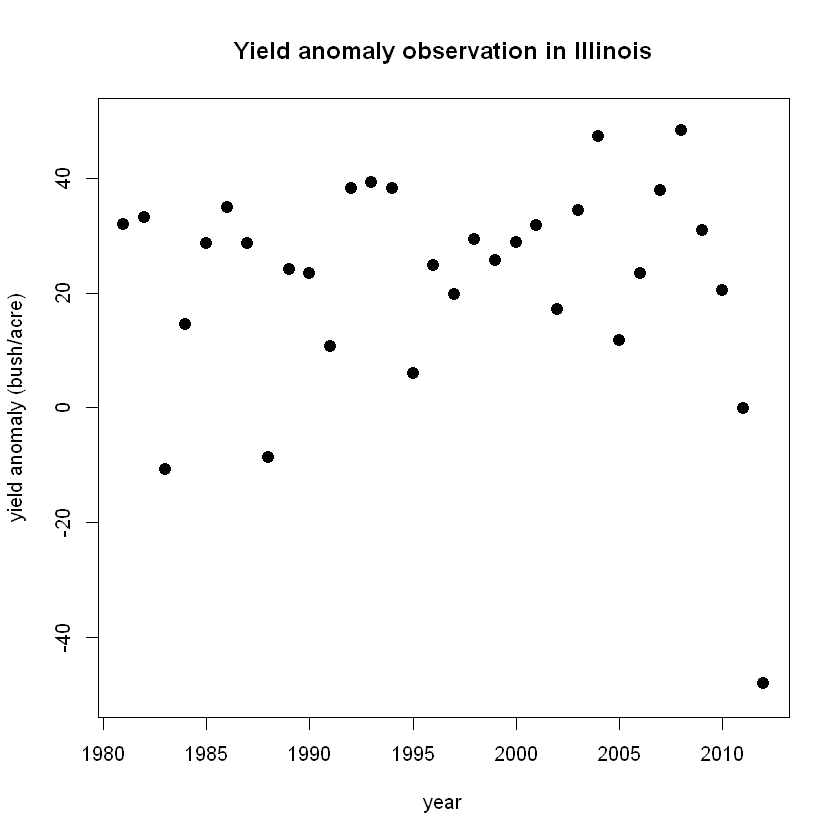

In [3]:
# Load yield data and weather data: annual county-wise data in 1981-2012, weather variables are growing season level data
# This datframe includes yield anomaly and six important weather variables (all in county level):
# Temperature maximum & minimum (Tmax & Tmin), growing degree days (GDD), extreme growing degree days (EDD), 
# precipitation (Pr), and vapor pressure deficit (VPD)

load("Data_IL")
# Model regression is based on county level data, the pre-calibration is based on annual state mean because we want the model 
#    to reproduce the state-level yield pattern
# The state level mean yield in each year:
meanyield_anomaly<-rep(NA,32)
for (i in 1:32){
  indx<-which(Data_IL$year==levels(Data_IL$year)[i])
  meanyield_anomaly[i]<-weighted.mean(Data_IL$yield_anomaly[indx],na.rm=T,weight=Data_IL$area)
}
plot(c(1981:2012),meanyield_anomaly,ylim=c(-50,50),pch=20,xlab="year",ylab="yield anomaly (bush/acre)",cex=2)
title("Yield anomaly observation in Illinois")


Call:
lm(formula = yield_anomaly ~ Tmax_GS + Tmin_GS + GDD_GS + EDD_GS + 
    Pr_GS + VPD_GS, data = Data_IL, weights = Data_IL$area)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3268.3  -375.3    61.8   476.7  2726.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.371e+02  3.015e+01 -11.181  < 2e-16 ***
Tmax_GS      1.836e+01  1.507e+00  12.186  < 2e-16 ***
Tmin_GS     -1.303e+00  1.558e+00  -0.836  0.40309    
GDD_GS      -5.437e-02  1.716e-02  -3.168  0.00155 ** 
EDD_GS      -5.535e-01  1.715e-02 -32.276  < 2e-16 ***
Pr_GS        1.612e-02  3.239e-03   4.976 6.82e-07 ***
VPD_GS       4.955e-01  5.816e-02   8.520  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 762.4 on 3230 degrees of freedom
Multiple R-squared:  0.5433,	Adjusted R-squared:  0.5424 
F-statistic: 640.4 on 6 and 3230 DF,  p-value: < 2.2e-16


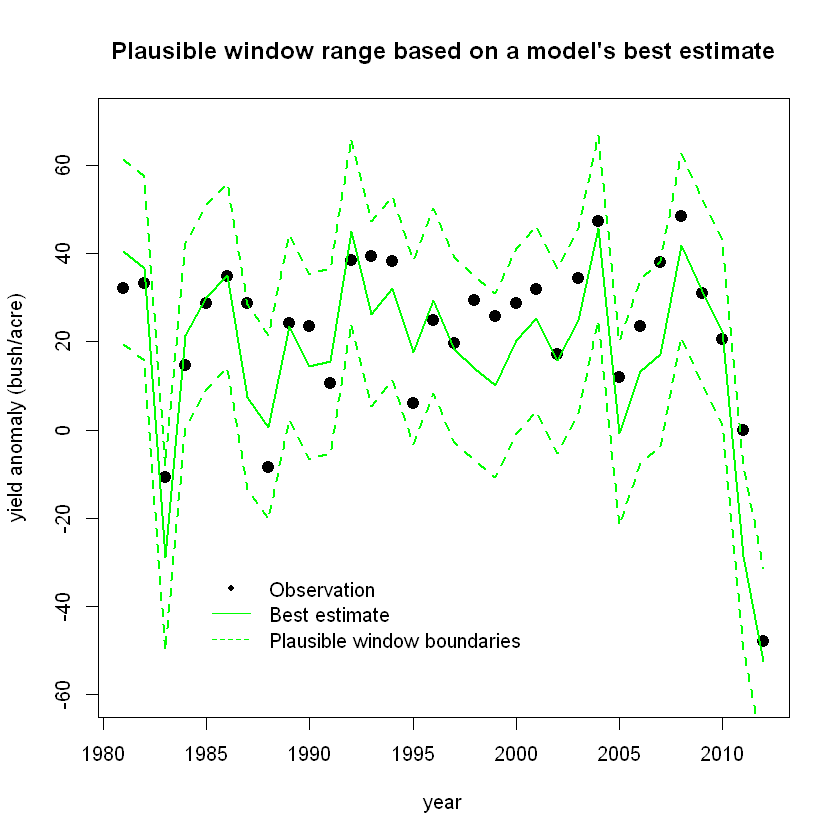

In [49]:
# Regress a linear model with all six weather variables
 model<-lm(yield_anomaly~Tmax_GS+Tmin_GS+GDD_GS+EDD_GS+Pr_GS+VPD_GS,data=Data_IL,weights=Data_IL$area)
 #model<-lm(yield_anomaly~Tmin_GS+Pr_GS+VPD_GS,data=Data_IL,weights=Data_IL$area)
bestestimate<-predict(model,Data_IL)
summary(model)
plot(c(1981:2012),meanyield_anomaly,ylim=c(-60,70),pch=20,xlab="year",ylab="yield anomaly (bush/acre)",cex=2)
state_bestestimate<-rep(NA,32)
for (i in 1:32){
    indx<-which(Data_IL$year==levels(Data_IL$year)[i])
    state_bestestimate[i]<-weighted.mean(bestestimate[i],weight=Data_IL$area)
}
lines(c(1981:2012),state_bestestimate,col="green",lwd=2)
difference<-abs(meanyield_anomaly-state_bestestimate)
step<-quantile(difference,0.95)
upperbound<-state_bestestimate+step
lowerbound<-state_bestestimate-step
lines(c(1981:2012),upperbound,col="green",lty=2,lwd=2)
lines(c(1981:2012),lowerbound,col="green",lty=2,lwd=2)
legend(1985,-30,pch=c(20,NA,NA),lty=c(NA,1,2),col=c("black","green","green"),legend=c("Observation","Best estimate","Plausible window boundaries"),bty='n')
title("Plausible window range based on a model's best estimate")


Call:
lm(formula = yield_anomaly ~ Tmin_GS + Pr_GS + VPD_GS, data = Data_IL, 
    weights = Data_IL$area)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-6162.6  -425.5   117.4   613.9  3634.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 160.832159  13.792042  11.661  < 2e-16 ***
Tmin_GS     -10.426781   0.572710 -18.206  < 2e-16 ***
Pr_GS         0.040751   0.003524  11.565  < 2e-16 ***
VPD_GS       -0.246984   0.064256  -3.844 0.000124 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1001 on 3233 degrees of freedom
Multiple R-squared:  0.2121,	Adjusted R-squared:  0.2114 
F-statistic: 290.2 on 3 and 3233 DF,  p-value: < 2.2e-16


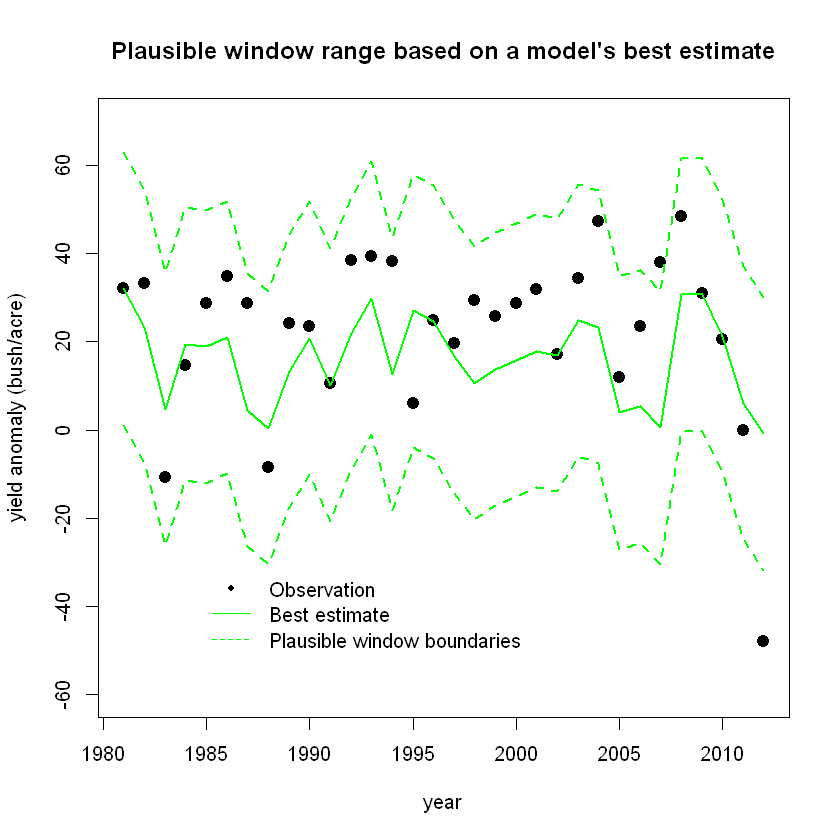

In [4]:
 #model<-lm(yield_anomaly~Tmax_GS+Tmin_GS+GDD_GS+EDD_GS+Pr_GS+VPD_GS,data=Data_IL,weights=Data_IL$area)
model<-lm(yield_anomaly~Tmin_GS+Pr_GS+VPD_GS,data=Data_IL,weights=Data_IL$area)
bestestimate<-predict(model,Data_IL)
summary(model)
plot(c(1981:2012),meanyield_anomaly,ylim=c(-60,70),pch=20,xlab="year",ylab="yield anomaly (bush/acre)",cex=2)
state_bestestimate<-rep(NA,32)
for (i in 1:32){
    indx<-which(Data_IL$year==levels(Data_IL$year)[i])
    state_bestestimate[i]<-weighted.mean(bestestimate[i],weight=Data_IL$area)
}
lines(c(1981:2012),state_bestestimate,col="green",lwd=2)
difference<-abs(meanyield_anomaly-state_bestestimate)
step<-quantile(difference,0.95)
upperbound<-state_bestestimate+step
lowerbound<-state_bestestimate-step
lines(c(1981:2012),upperbound,col="green",lty=2,lwd=2)
lines(c(1981:2012),lowerbound,col="green",lty=2,lwd=2)
legend(1985,-30,pch=c(20,NA,NA),lty=c(NA,1,2),col=c("black","green","green"),legend=c("Observation","Best estimate","Plausible window boundaries"),bty='n')
title("Plausible window range based on a model's best estimate")

In [17]:
parasamplenum<-10000
hindyear<-32
Tstructure<-c(5,6,7,8)
Pstructure<-c(9,10)
Tnum<-2^length(Tstructure)
Pnum<-2^length(Pstructure)
strunum<-Tnum*Pnum
hind_fit<-matrix(NA,nrow = strunum,ncol=hindyear)
hind_parasample<-array(NA,c(strunum,hindyear,parasamplenum))
totlen=dim(Data_IL)[1]
Tnames<-rep("/",Tnum)
for(i in 1:(Tnum-1)){
  Tindx<-as.binary(i,n=length(Tstructure))
  Tnames[i+1]<-paste(colnames(Data_IL)[Tstructure[Tindx]],collapse = "+")
}
Pnames<-rep("/",Pnum)
for(i in 1:(Pnum-1)){
  Pindx<-as.binary(i,n=length(Pstructure))
  Pnames[i+1]<-paste(colnames(Data_IL)[Pstructure[Pindx]],collapse = "+")
}

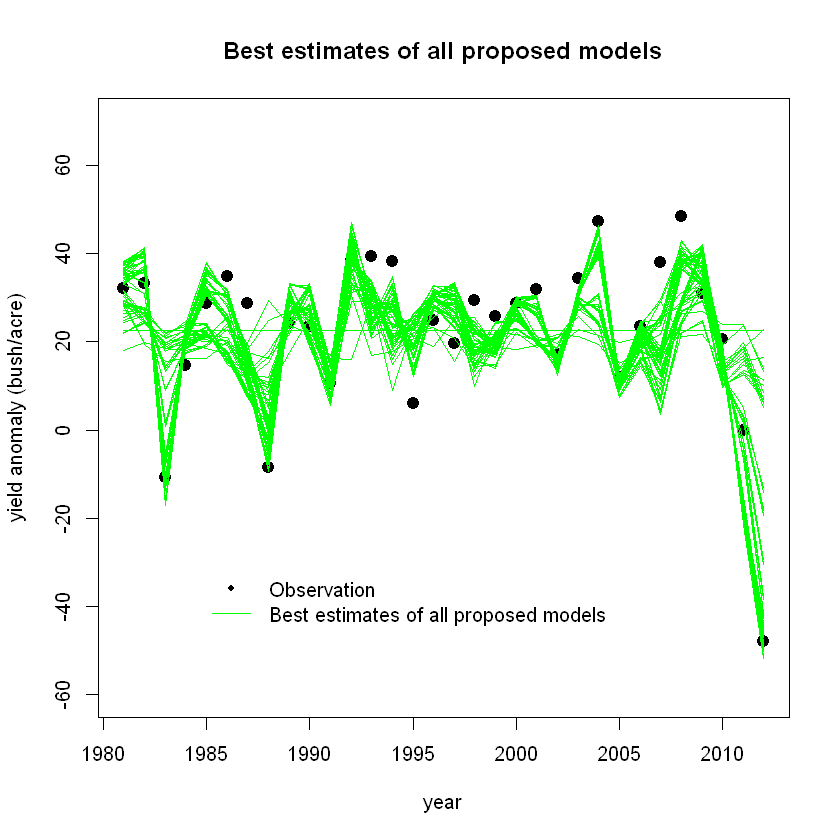

In [45]:
All_hind_fit<-matrix(NA,nrow=strunum,ncol=hindyear)
for (i in 1:Tnum){ #T
  for (j in 1:Pnum){ #P
    if (i==1 & j==1){
      model<-lm(yield_anomaly~1,data=Data_IL)
    } else if (i==1 & j>1){
      model<-lm(as.formula(paste("yield_anomaly ~ ",Pnames[j], sep="") ),data=Data_IL,weight=Data_IL$area)
    } else if (j==1 & i>1){
      model<-lm(as.formula(paste("yield_anomaly ~ ",Tnames[i], sep="") ),data=Data_IL,weight=Data_IL$area)
    } else {
      model<-lm(as.formula(paste("yield_anomaly ~ ",paste(Tnames[i], Pnames[j],sep="+"), sep="") ),data=Data_IL,weight=Data_IL$area)
    }
    hind<-predict(model,Data_IL)
    for (k in 1:hindyear){
        indx<-which(Data_IL$year==levels(Data_IL$year)[k])
        All_hind_fit[(i-1)*Pnum+j,k] <-mean(hind[indx],na.rm=TRUE,w = Data_IL$area[indx])
    }
  }
}
plot(c(1981:2012),meanyield_anomaly,ylim=c(-60,70),pch=20,xlab="year",ylab="yield anomaly (bush/acre)",cex=2)
for (i in 1:64){
    lines(c(1981:2012),All_hind_fit[i, ],col="green",lwd=0.2)
}
legend(1985,-30,pch=c(20,NA),lty=c(NA,1),col=c("black","green"),legend=c("Observation","Best estimates of all proposed models"),bty='n')
title("Best estimates of all proposed models")

In [50]:

#the uniform wide prior range of each parameter
para_range<-data.frame(Intercept=c(-500,-200),others=c(-10,30))
#Uncertainty sampling part
set.seed(666)
for (i in 1:Tnum){ #T
  for (j in 1:Pnum){ #P
    if (i==1 & j==1){
      model<-lm(yield_anomaly~1,data=Data_IL)
    } else if (i==1 & j>1){
      model<-lm(as.formula(paste("yield_anomaly ~ ",Pnames[j], sep="") ),data=Data_IL,weight=Data_IL$area)
    } else if (j==1 & i>1){
      model<-lm(as.formula(paste("yield_anomaly ~ ",Tnames[i], sep="") ),data=Data_IL,weight=Data_IL$area)
    } else {
      model<-lm(as.formula(paste("yield_anomaly ~ ",paste(Tnames[i], Pnames[j],sep="+"), sep="") ),data=Data_IL,weight=Data_IL$area)
    }

    variablenames<-variable.names(model)
    variablenum<-length(variablenames)
     
    #the structure must contain EDD
    if ((variablenum!=1) & ('EDD_GS' %in% variablenames)){
      #for hindcast of each parametric sample
      col_data_hind<-rep(NA,variablenum-1) #first variable is intercept
      for (m in 1:(variablenum-1)){
        col_data_hind[m]<-which(colnames(Data_IL)==variablenames[m+1])
      }
    
      hind<-predict(model,Data_IL)
      #use each model's best estimate to find a plausible window that covers 95% annual yield observation
      Besthind<-data.frame(yield_anomaly=hind,area=Data_IL$area)
      hind_yield_anomaly<-rep(NA,hindyear)
      for (k in 1:hindyear){
        indx<-which(Data_IL$year==levels(Data_IL$year)[k])
        hind_yield_anomaly[k]<-weighted.mean(Besthind$yield_anomaly[indx],na.rm=T,w = Besthind$area[indx])
      } 
      difference<-abs(hind_yield_anomaly-meanyield_anomaly)
      step<-quantile(difference,0.95)
      upperbound<-hind_yield_anomaly+step
      lowerbound<-hind_yield_anomaly-step
    
      #Latin hypercube sampling in a range for all parameters defined above
      MCpara<-randomLHS(parasamplenum,variablenum)*(para_range[2,2]-para_range[1,2])+para_range[1,2]
      #intercept range is different (wider)
      MCpara[ ,1]<-MCpara[ ,1]*((para_range[2,1]-para_range[1,1])/(para_range[2,2]-para_range[1,2]))
    
      for (k in 1:hindyear){
        indx<-which(Data_IL$year==levels(Data_IL$year)[k])
        hind_fit[(i-1)*Pnum+j,k]<-mean(hind[indx],na.rm=TRUE,w = Data_IL$area[indx])
        for (n in 1:parasamplenum){
          hind_parasample[(i-1)*Pnum+j,k,n]<-MCpara[n,1]+MCpara[n,2:variablenum]%*%colMeans(as.matrix(Data_IL[indx,col_data_hind]))
        }
      }
    
      #keep the samples with hindcast passing the plausible window
      for (n in 1:parasamplenum){
        if (frac_between(hind_parasample[(i-1)*Pnum+j, ,n],lowerbound,upperbound)!=1){
          hind_parasample[(i-1)*Pnum+j, ,n]<-NA
        }
      }
      
    }
      
  }
}


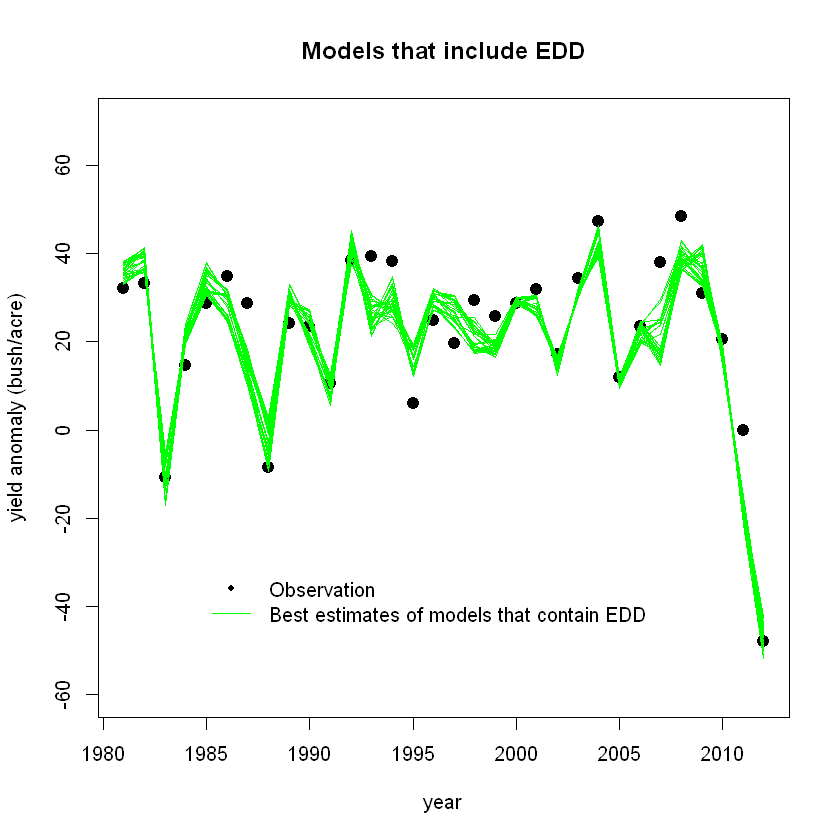

In [37]:
plot(c(1981:2012),meanyield_anomaly,ylim=c(-60,70),pch=20,xlab="year",ylab="yield anomaly (bush/acre)",cex=2)
for (i in 1:64){
    if (!is.na(hind_fit[i,1])){
        lines(c(1981:2012),hind_fit[i, ],col="green",lwd=0.2)
    }
}
legend(1985,-30,pch=c(20,NA),lty=c(NA,1),col=c("black","green"),legend=c("Observation","Best estimates of models that contain EDD"),bty='n')
title("Models that include EDD")

In [ ]:
plot(c(1981:2012),meanyield_anomaly,ylim=c(-60,70),pch=20,xlab="year",ylab="yield anomaly (bush/acre)",cex=2)
for (i in 1:64){
    for (j in 1:parasamplenum){
        if (!is.na(hind_parasample[i,1,j])){
            lines(c(1981:2012),hind_parasample[i, ,j],col="green",lwd=0.1)
        }
    }
}